# Logistic Regression

### Bir e-ticaret şirketi, müşterilerinin web sitesinde bir ürün satın alıp almama olasılığını tahmin etmek istiyor. Bu nedenle, geçmiş verileri kullanarak lojistik regresyon modeli oluşturacağız.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Veri setini oluşturalım.
np.random.seed(0)

n_samples = 1000

visit_duration = np.random.normal(5, 1, n_samples)
page_views = np.random.randint(1, 20, n_samples)
user_type = np.random.choice(['registered', 'guest'], n_samples)

# Satın alma durumunu oluşturalım.
p = 1 / (1 + np.exp(-(3 + 0.5 * visit_duration - 0.1 * page_views + (user_type == 'registered'))))
purchase_status = np.random.binomial(1, p)

data = pd.DataFrame({
    'Visit Duration': visit_duration,
    'Page Views': page_views,
    'User Type': user_type,
    'Purchase Status': purchase_status
})
data.head()

,Visit Duration,Page Views,User Type,Purchase Status
0,6.764052,1,guest,1
1,5.400157,7,registered,1
2,5.978738,2,registered,1
3,7.240893,13,guest,1
4,6.867558,10,registered,1


In [3]:
data['Purchase Status'].unique()

array([1, 0])

# Veri Analizi

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit Duration,1000.0,4.954743,0.987527,1.953857,4.30158,4.941972,5.606951,7.759355
Page Views,1000.0,10.207000,5.339725,1.000000,6.00000,10.000000,15.000000,19.000000
Purchase Status,1000.0,0.991000,0.094488,0.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Visit Duration   1000 non-null   float64
 1   Page Views       1000 non-null   int32  
 2   User Type        1000 non-null   object 
 3   Purchase Status  1000 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 23.6+ KB


In [6]:
data.corr()

,Visit Duration,Page Views,Purchase Status
Visit Duration,1.000000,0.028042,0.048415
Page Views,0.028042,1.000000,-0.020112
Purchase Status,0.048415,-0.020112,1.000000


In [7]:
data.var(numeric_only=True)

Visit Duration      0.975210
Page Views         28.512664
Purchase Status     0.008928
dtype: float64

In [8]:
data.isnull().any().sum()

0

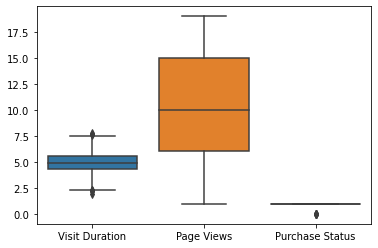

In [9]:
sns.boxplot(data=data);

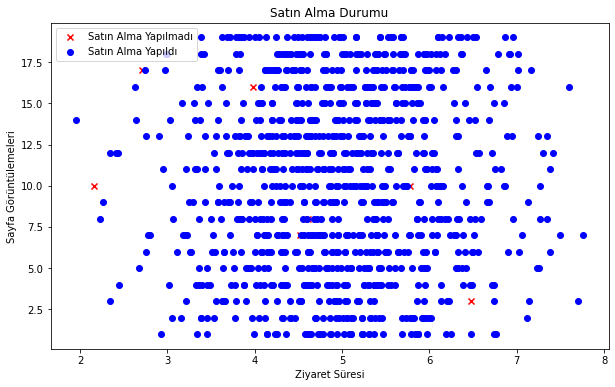

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Purchase Status'] == 0]['Visit Duration'], data[data['Purchase Status'] == 0]['Page Views'], c='r', marker='x', label='Satın Alma Yapılmadı')
plt.scatter(data[data['Purchase Status'] == 1]['Visit Duration'], data[data['Purchase Status'] == 1]['Page Views'], c='b', marker='o', label='Satın Alma Yapıldı')
plt.title('Satın Alma Durumu')
plt.xlabel('Ziyaret Süresi')
plt.ylabel('Sayfa Görüntülemeleri')
plt.legend()
plt.show()

# Veri Ön İşleme

In [11]:
data.head(1)

,Visit Duration,Page Views,User Type,Purchase Status
0,6.764052,1,guest,1


In [12]:
q1, q3 = (data['Visit Duration'].quantile(0.25), data['Visit Duration'].quantile(0.75))
iqr = q3 - q1
alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr
data['Visit Duration'] = np.clip(data['Visit Duration'], alt_sinir, ust_sinir)

In [13]:
data['User Type'] = data['User Type'].map({'guest':0, 'registered':1})

In [14]:
lbe = StandardScaler()
data['Visit Duration'] = lbe.fit_transform(data[['Visit Duration']])
data['Page Views'] = lbe.fit_transform(data[['Page Views']])
data['User Type'] = lbe.fit_transform(data[['User Type']])

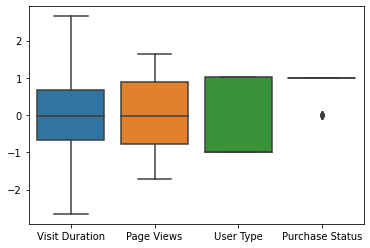

In [15]:
sns.boxplot(data=data);

# Model

In [16]:
data['Purchase Status'].unique()

array([1, 0])

In [17]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.
X = data.drop('Purchase Status', axis=1)
y = data['Purchase Status']

In [18]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Modeli oluşturalım ve eğitelim.
model = LogisticRegression().fit(X_train, y_train)

In [20]:
# Tahmin İşlemi
predict = model.predict(X_test)

In [21]:
# Model Değerlendirme
accuracy = accuracy_score(y_test, predict)
print('Accuracy of Model: ', accuracy)

Accuracy of Model:  1.0


### Görüldüğü üzere modelimiz %100 doğruluk gösterdi. Üzerinde çalıştığımız veri setini kendimiz oluşturduğumuz için gerçek hayat senaryosu değildir. Bu tarz bir durumda model geliştirme işlemi yapmaya gerek yok fakat biz hiperparametreleri inceleyeceğiz.

In [23]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hiperparametreler için detaylı bilgi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html